Import useful modules:

In [40]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy
from cartopy.io import shapereader
import cartopy.crs as ccrs
import geopandas
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

Define country codes using the ISO 3166-1 alpha-3 standard:

In [41]:
Europe_ia3 = {  
            'Albania':'ALB',
            'Austria':'AUT',
            'Bosnia and Herzegovina':'BIH', 
            'Belgium':'BEL',
            'Bulgaria':'BGR', 
            'Switzerland':'CHE', 
            'Czechia':'CZE', 
            'Germany':'DEU', 
            'Denmark':'DNK', 
            'Estonia':'EST', 
            'Spain':'ESP', 
            'Finland':'FIN', 
            'France':'FRA', 
            'United Kingdom':'GBR', 
            'Greece':'GRC', 
            'Croatia':'HRV', 
            'Hungary':'HUN', 
            'Ireland':'IRL', 
            'Italy':'ITA', 
            'Lithuania':'LTU', 
            'Luxembourg':'LUX', 
            'Latvia':'LVA', 
            'Montenegro':'MNE', 
            #'Macedonia':'MKD', 
            'Netherlands':'NLD', 
            'Norway':'NOR', 
            'Poland':'POL', 
            'Portugal':'PRT', 
            'Romania':'ROU', 
            #'Serbia':'SRB', 
            'Sweden':'SWE', 
            'Slovenia':'SVN', 
            'Slovakia':'SVK'
            }

Use basemap to initialize a map. Define geographical domain, map projection, resolution, and coordinate of the center.

In [42]:
# get natural earth data (http://www.naturalearthdata.com/)

# get country borders
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
shpfilename = shapereader.natural_earth(resolution, category, name)
# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

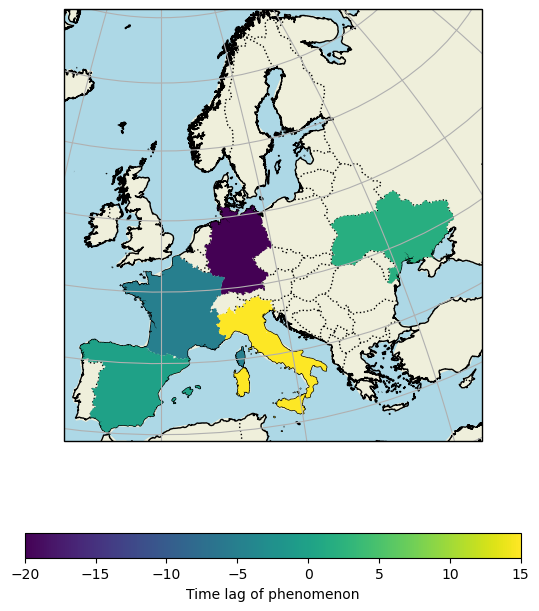

In [43]:
# Set up the canvas
fig = plt.figure(figsize=(8, 8))
central_lon, central_lat = 0, 45
extent = [-10, 35, 35, 70]
#ax = plt.axes(projection=cartopy.crs.LambertAzimuthalEqualArea(central_lon, central_lat))
ax = plt.axes(projection=cartopy.crs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()

# Add natural earth features and borders
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1)
ax.add_feature(cartopy.feature.OCEAN, facecolor=("lightblue"))
ax.add_feature(cartopy.feature.LAND)
ax.coastlines(resolution='10m')

# Insert your lists of countries and lag times here
countries = ['Germany', 'France', 'Italy', 'Spain', 'Ukraine']
lags = [-20,-5, 15, 0, 2]

# Normalise the lag times to between 0 and 1 to extract the colour
lags_norm = (lags-np.nanmin(lags))/(np.nanmax(lags) - np.nanmin(lags))

# Choose your colourmap here
cmap = matplotlib.cm.get_cmap('viridis')

for country, lag_norm in zip(countries, lags_norm):
    # read the borders of the country in this loop
    poly = [df.loc[df['ADMIN'] == country]['geometry'].values[0]]
    # get the color for this country
    rgba = cmap(lag_norm)
    # plot the country on a map
    ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=rgba, edgecolor='none', zorder=1)

# Add a scatter plot of the original data so the colorbar has the correct numbers. Hacky but it works
dummy_scat = ax.scatter(lags, lags, c=lags, cmap=cmap, zorder=0)
fig.colorbar(mappable=dummy_scat, label='Time lag of phenomenon', orientation='horizontal', shrink=0.8)

In [54]:
fig, m_plot = plt.subplots(1,1,figsize=(10,20))
central_lon, central_lat = 9.5, 54.5
extent = [-10, 33, 33, 72] #[-10, 45, 35, 70]
#ax = plt.axes(projection=cartopy.crs.LambertAzimuthalEqualArea(central_lon, central_lat))
#ax = plt.axes(projection=cartopy.crs.Orthographic(central_lon, central_lat))

m_plot = plt.axes(projection=cartopy.crs.LambertAzimuthalEqualArea(central_lon, central_lat))
m_plot.set_extent(extent)
#Basemap(width=11500000/2.9,height=9000000/2.2,projection='laea',
#                  resolution='i',lat_0=54.5,lon_0=9.5,ax=ax)
plt.close(fig)

Here is the data that you want to visualize in the map. As an example, we allocate the value '50' to all countries:

In [45]:
data_example = [50]*len(Europe_ia3.keys())
df = pd.DataFrame(index=Europe_ia3.keys(),
                 data=data_example,columns=['data'])

In [46]:
df.head()

,data
Albania,50
Austria,50
Bosnia and Herzegovina,50
Belgium,50
Bulgaria,50


To examplify how the data does not have to be uniform, we allocate other values to a few of the countries:

In [47]:
df.loc[['Denmark','Norway','Sweden']] = 70

Choose colormap and datarange for color bar:

In [48]:
cmap = cm.get_cmap('Blues', 12)
norm=plt.Normalize(0,100)

Plot data:

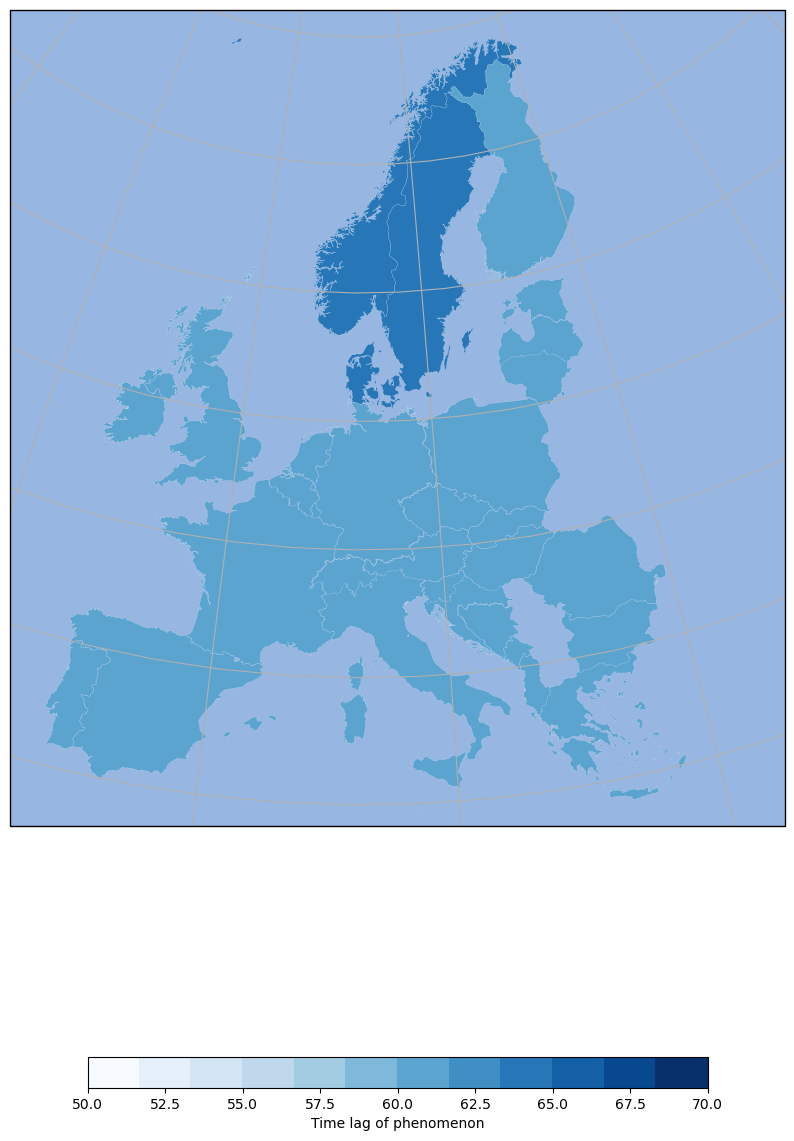

In [55]:
m_plot.gridlines()

# Add natural earth features and borders

resol = '10m'  # use data at this scale
bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='w', facecolor=cartopy.feature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cartopy.feature.COLORS['water'])
#lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', \
#    scale=resol, edgecolor='b', facecolor=cartopy.feature.COLORS['water'])
#rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
#    scale=resol, edgecolor='b', facecolor='none')

m_plot.add_feature(land, facecolor='beige')
m_plot.add_feature(ocean, linewidth=0.2 )
#m_plot.outline_patch.set_linewidth(0.1)
#m_plot.add_feature(lakes)
#m_plot.add_feature(rivers, linewidth=0.5)
#m_plot.add_feature(bodr, linestyle='-', edgecolor='w', alpha=1)


# m_plot.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1)
# m_plot.add_feature(cartopy.feature.OCEAN, facecolor=("lightblue"))
# m_plot.add_feature(cartopy.feature.LAND)
# m_plot.coastlines(resolution='10m')
df_data = geopandas.read_file(shpfilename)
# country_names = df_data['ADMIN']
for country, lag_norm in zip(df.index, df.data):
    # print(country, lag_norm)
#      # read the borders of the country in this loop
    poly = [df_data.loc[df_data['ADMIN'] == country]['geometry'].values[0]]
#     # get the color for this country
    rgba = cmap(norm(lag_norm))
#     # plot the country on a map
    m_plot.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=rgba, edgecolor='w',linewidth=0.1, zorder=1)
# Add a scatter plot of the original data so the colorbar has the correct numbers. Hacky but it works
dummy_scat = ax.scatter(df.data, df.data, c=df.data, cmap=cmap, zorder=0)
fig.colorbar(mappable=dummy_scat, label='Time lag of phenomenon', orientation='horizontal', shrink=0.8)
fig

In [50]:
for c in Europe_ia3.keys():
    m_plot.readshapefile('shapefiles/gadm36_' + Europe_ia3[c] + '_0',c,drawbounds=True,linewidth = 0,color='k')
    patches = []
    value = df.loc[c].item()
    for info, shape in zip(eval('m_plot.' + c + '_info'), eval('m_plot.' + c)):
        patches.append(Polygon(np.array(shape), True))
    patch1=ax.add_collection(PatchCollection(patches, facecolor= cmap(norm(value))))

AttributeError: 'GeoAxesSubplot' object has no attribute 'readshapefile'

Add color bar:

In [ ]:
cb_ax = fig.add_axes([0.95,0.295,0.02,0.21])
cb1 = mpl.colorbar.ColorbarBase(cb_ax,
                                orientation='vertical', 
                                cmap=cmap,norm=norm,
                                boundaries=np.arange(0,100)
                               )

cb1.set_label('Data',zorder=10,fontsize=15)
cb1.ax.tick_params(labelsize=15)

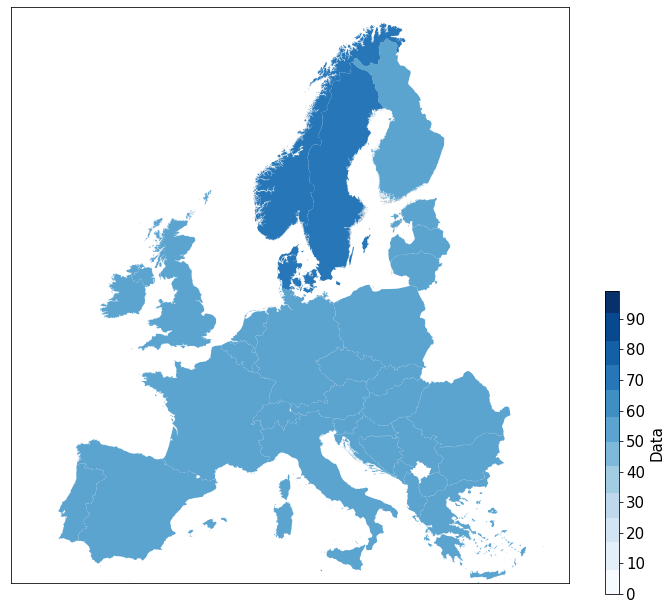

In [ ]:
fig

In [ ]:
fig.savefig('national_colors.png',dpi=300,bbox_inches='tight')  